# БФБО-05-23 Баранов Арсений Юрьевич

## Загрузить данные

В этом примере мы используем набор данных iris. Мы разделяем данные на обучающий и тестовый наборы данных.

In [13]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Загрузка данных Iris
iris = load_iris(as_frame=True)


X = iris.data[["sepal length (cm)", "sepal width (cm)"]]

# Метка класса, которая определяет вид ириса (setosa, versicolor, virginica)
y = iris.target

# Разделение данных на тренировочный и тестовый наборы с сохранением пропорций классов (stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

## Классификатор K-ближайших соседей

Мы хотим использовать классификатор k-ближайших соседей, рассматривающий соседство из 11 точек данных. Поскольку наша модель k-ближайших соседей использует евклидово расстояние для поиска ближайших соседей, поэтому важно заранее масштабировать данные

Таким образом, мы используем a Pipelineдля объединения масштабирующего устройства перед использованием нашего классификатора.

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Создание пайплайна
clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))]
)

## Граница принятия решения

Теперь мы подгоняем два классификатора с разными значениями параметра weights. Мы строим границу решения каждого классификатора, а также исходного набора данных, чтобы наблюдать разницу.

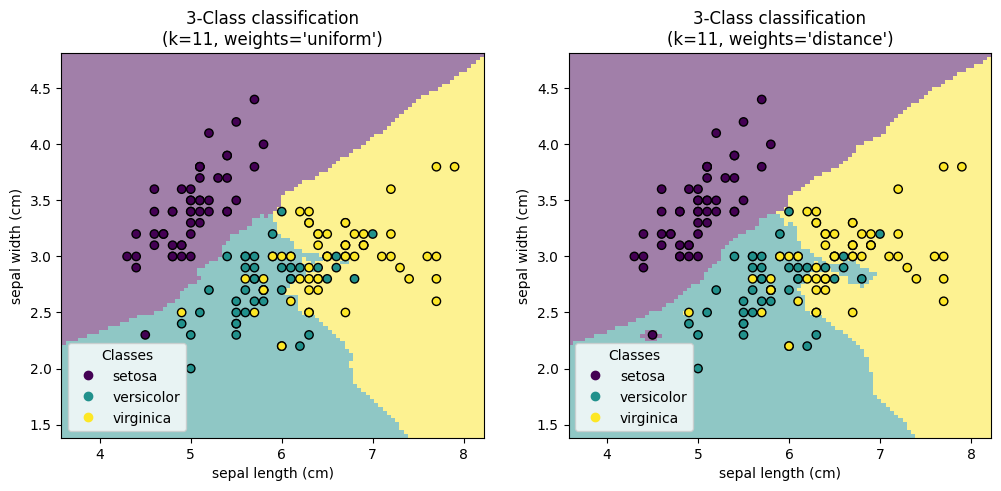

In [15]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

# Создание двух графиков
_, axs = plt.subplots(ncols=2, figsize=(12, 5))

# веса
for ax, weights in zip(axs, ("uniform", "distance")):
    
    # weights у KNN-классификатора и обучение 
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    
    # Отображение границы решений
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,  
        response_method="predict",  
        plot_method="pcolormesh",  
        xlabel=iris.feature_names[0],  
        ylabel=iris.feature_names[1],  
        shading="auto",  # Автоматическое сглаживание
        alpha=0.5,  # Прозрачность для отображаемой границы решений
        ax=ax,  # Текущий график для отображения
    )
    
    # Отображение точек данных (различных классов) на графике
    scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k")
    
    # Добавление легенды
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,  # Названия классов (setosa, versicolor, virginica)
        loc="lower left",  
        title="Classes",  
    )
    
    
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()

## Практическое задание


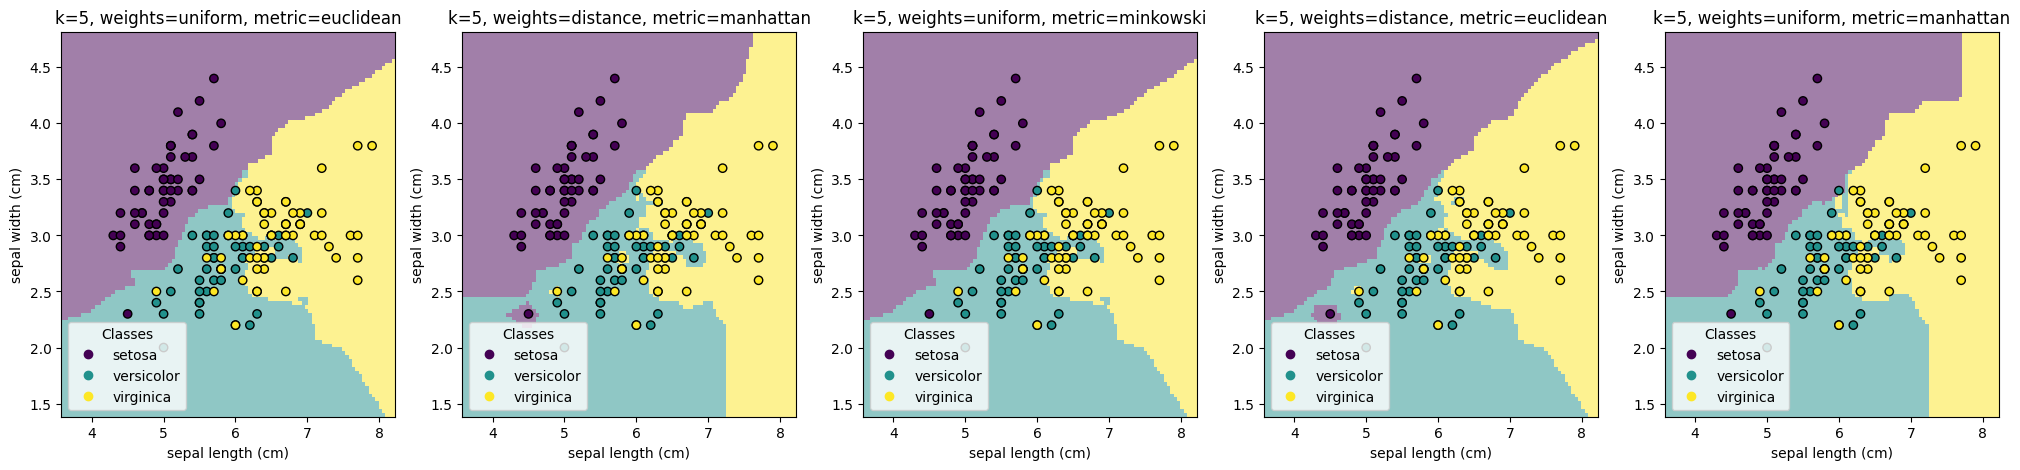

In [16]:

# данные
iris = load_iris(as_frame=True)
X = iris.data[["sepal length (cm)", "sepal width (cm)"]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

# Параметры для каждой модели
param_combinations = [
    {"n_neighbors": 5, "weights": "uniform", "metric": "euclidean"},
    {"n_neighbors": 5, "weights": "distance", "metric": "manhattan"},
    {"n_neighbors": 5, "weights": "uniform", "metric": "minkowski"},
    {"n_neighbors": 5, "weights": "distance", "metric": "euclidean"},
    {"n_neighbors": 5, "weights": "uniform", "metric": "manhattan"}
]

# Создаем фигуру для 5
fig, axs = plt.subplots(1, 5, figsize=(25, 5))

# Построение моделей для каждой комбинации гиперпараметров
for ax, params in zip(axs, param_combinations):
    
    # модель KNN
    clf = Pipeline(
        steps=[("scaler", StandardScaler()), 
               ("knn", KNeighborsClassifier(n_neighbors=params["n_neighbors"], 
                                            weights=params["weights"], 
                                            metric=params["metric"]))]
    )
    
    # Обучение
    clf.fit(X_train, y_train)
    
    # Визуализация
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    
    # Отображаем точки данных
    scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k")
    
    # легенда
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="lower left",
        title="Classes",
    )
    
    # заголовки
    _ = disp.ax_.set_title(
        f"k={params['n_neighbors']}, weights={params['weights']}, metric={params['metric']}"
    )

# Отображение
plt.show()


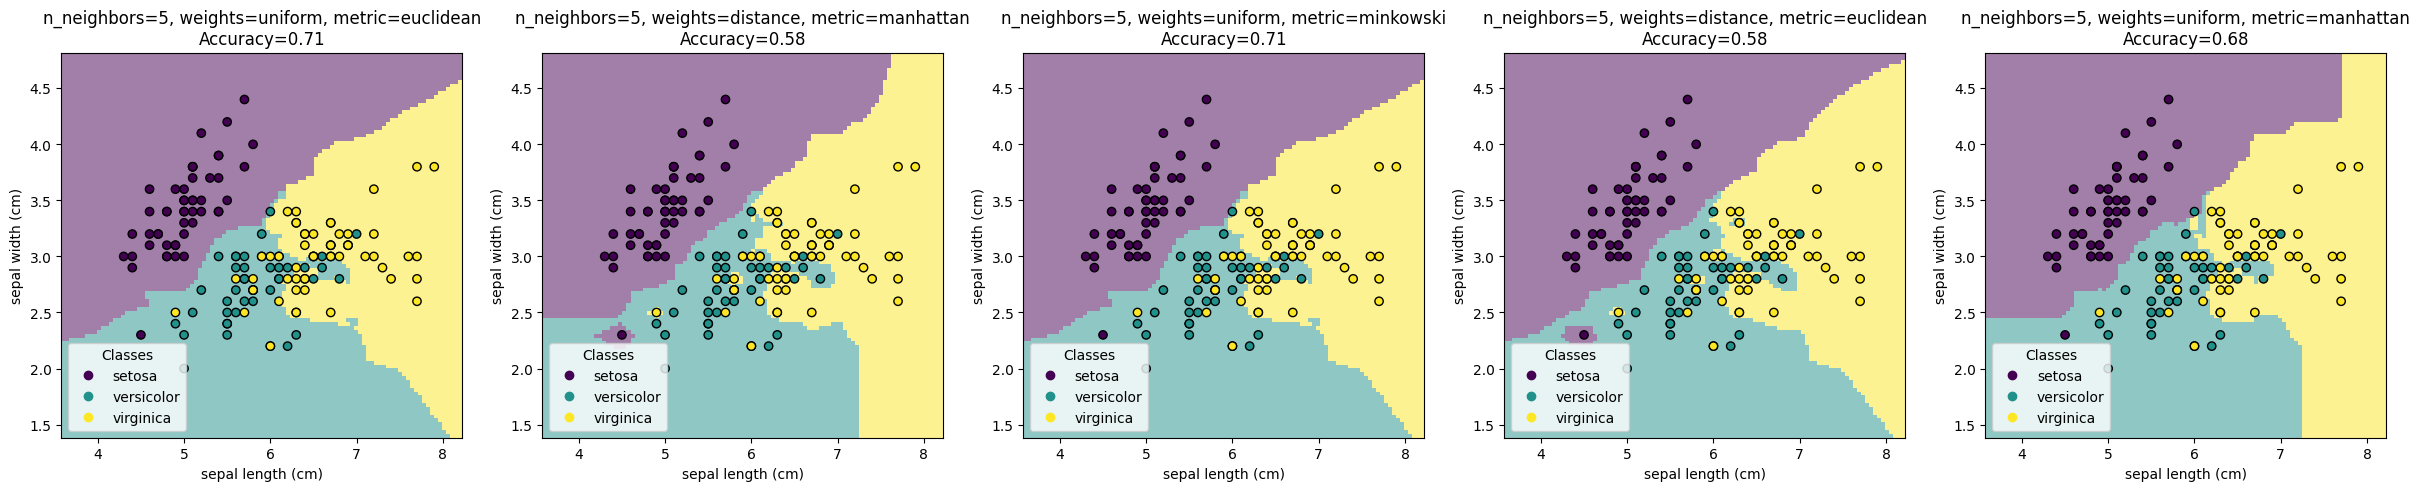

In [17]:

# данные
iris = load_iris(as_frame=True)
X = iris.data[["sepal length (cm)", "sepal width (cm)"]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)


param_combinations = [
    {"n_neighbors": 5, "weights": "uniform", "metric": "euclidean"},
    {"n_neighbors": 5, "weights": "distance", "metric": "manhattan"},
    {"n_neighbors": 5, "weights": "uniform", "metric": "minkowski"},
    {"n_neighbors": 5, "weights": "distance", "metric": "euclidean"},
    {"n_neighbors": 5, "weights": "uniform", "metric": "manhattan"}
]


fig, axs = plt.subplots(1, 5, figsize=(30, 5))


for ax, params in zip(axs, param_combinations):
    
    
    clf = Pipeline(
        steps=[("scaler", StandardScaler()), 
               ("knn", KNeighborsClassifier(n_neighbors=params["n_neighbors"], 
                                            weights=params["weights"], 
                                            metric=params["metric"]))]
    )
    
    clf.fit(X_train, y_train)
    
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    
    scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k")
    
    # Рассчитываем и выводим точность модели на тестовых данных
    accuracy = clf.score(X_test, y_test)
    
    
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="lower left",
        title="Classes",
    )
    
    
    _ = disp.ax_.set_title(
        f"n_neighbors={params['n_neighbors']}, weights={params['weights']}, metric={params['metric']}\nAccuracy={accuracy:.2f}"
    )

plt.show()

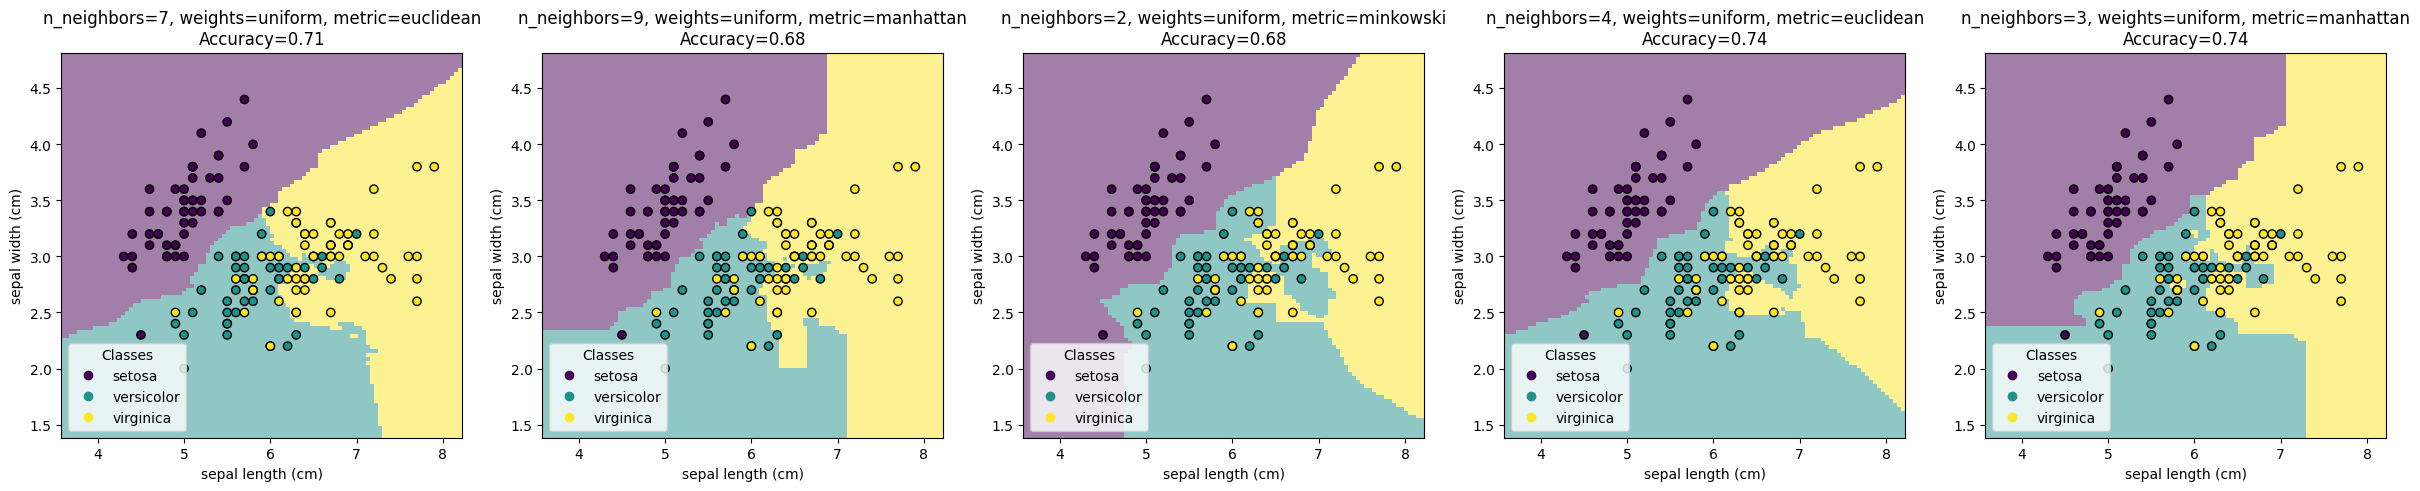

In [18]:
# данные
iris = load_iris(as_frame=True)
X = iris.data[["sepal length (cm)", "sepal width (cm)"]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)


param_combinations = [
    {"n_neighbors": 7, "weights": "uniform", "metric": "euclidean"},
    {"n_neighbors": 9, "weights": "uniform", "metric": "manhattan"},
    {"n_neighbors": 2, "weights": "uniform", "metric": "minkowski"},
    {"n_neighbors": 4, "weights": "uniform", "metric": "euclidean"},
    {"n_neighbors": 3, "weights": "uniform", "metric": "manhattan"}
]


fig, axs = plt.subplots(1, 5, figsize=(30, 5))


for ax, params in zip(axs, param_combinations):
    
    
    clf = Pipeline(
        steps=[("scaler", StandardScaler()), 
               ("knn", KNeighborsClassifier(n_neighbors=params["n_neighbors"], 
                                            weights=params["weights"], 
                                            metric=params["metric"]))]
    )
    
    clf.fit(X_train, y_train)
    
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    
    scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k")
    
    # Рассчитываем и выводим точность модели на тестовых данных
    accuracy = clf.score(X_test, y_test)
    
    
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="lower left",
        title="Classes",
    )
    
    
    _ = disp.ax_.set_title(
        f"n_neighbors={params['n_neighbors']}, weights={params['weights']}, metric={params['metric']}\nAccuracy={accuracy:.2f}"
    )

plt.show()

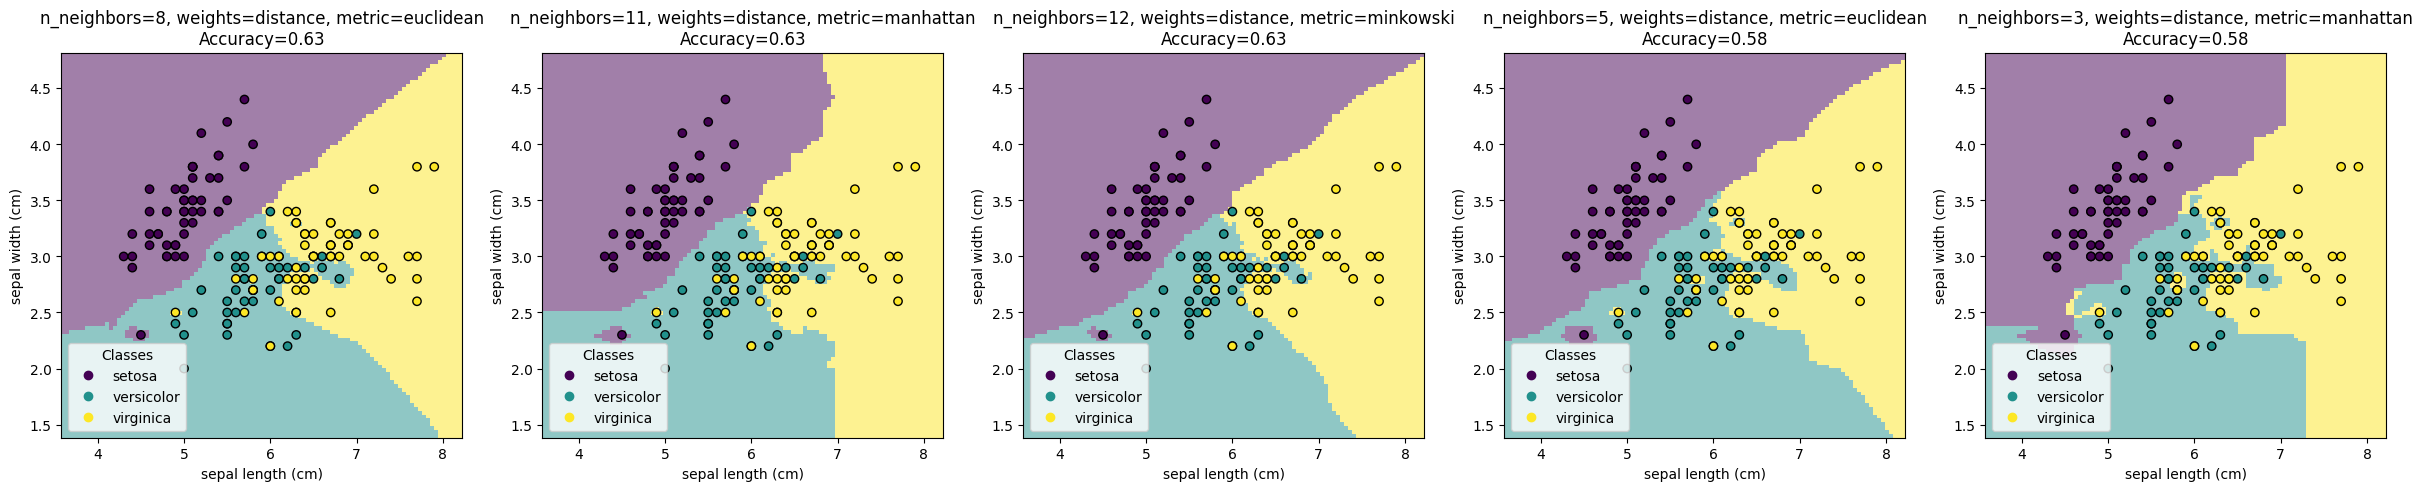

In [19]:
# данные
iris = load_iris(as_frame=True)
X = iris.data[["sepal length (cm)", "sepal width (cm)"]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)


param_combinations = [
    {"n_neighbors": 8, "weights": "distance", "metric": "euclidean"},
    {"n_neighbors": 11, "weights": "distance", "metric": "manhattan"},
    {"n_neighbors": 12, "weights": "distance", "metric": "minkowski"},
    {"n_neighbors": 5, "weights": "distance", "metric": "euclidean"},
    {"n_neighbors": 3, "weights": "distance", "metric": "manhattan"}
]


fig, axs = plt.subplots(1, 5, figsize=(30, 5))


for ax, params in zip(axs, param_combinations):
    
    
    clf = Pipeline(
        steps=[("scaler", StandardScaler()), 
               ("knn", KNeighborsClassifier(n_neighbors=params["n_neighbors"], 
                                            weights=params["weights"], 
                                            metric=params["metric"]))]
    )
    
    clf.fit(X_train, y_train)
    
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    
    scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k")
    
    # Рассчитываем и выводим точность модели на тестовых данных
    accuracy = clf.score(X_test, y_test)
    
    
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="lower left",
        title="Classes",
    )
    
    
    _ = disp.ax_.set_title(
        f"n_neighbors={params['n_neighbors']}, weights={params['weights']}, metric={params['metric']}\nAccuracy={accuracy:.2f}"
    )

plt.show()

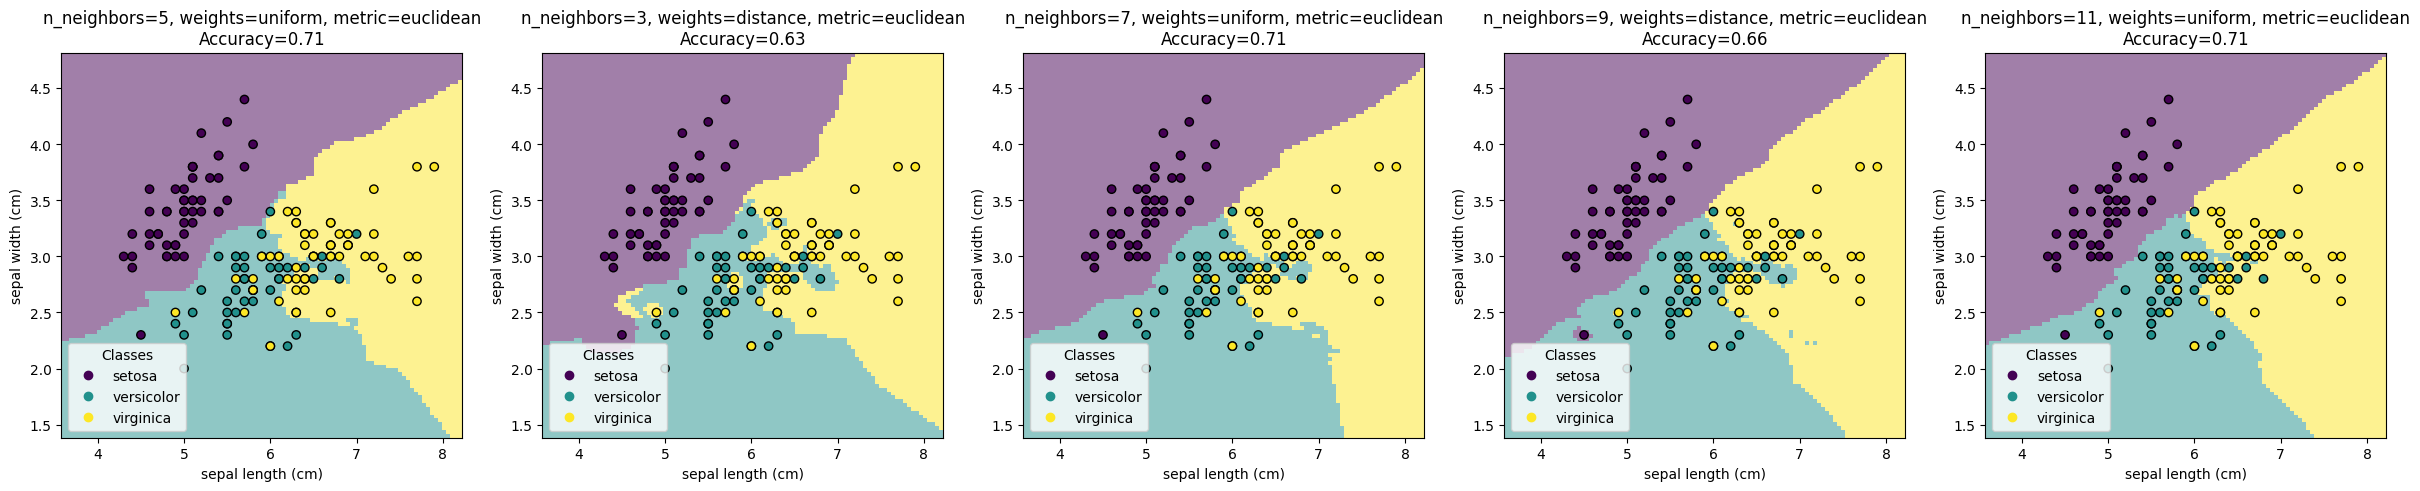

In [20]:
# данные
iris = load_iris(as_frame=True)
X = iris.data[["sepal length (cm)", "sepal width (cm)"]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)


param_combinations = [
    {"n_neighbors": 5, "weights": "uniform", "metric": "euclidean"},
    {"n_neighbors": 3, "weights": "distance", "metric": "euclidean"},
    {"n_neighbors": 7, "weights": "uniform", "metric": "euclidean"},
    {"n_neighbors": 9, "weights": "distance", "metric": "euclidean"},
    {"n_neighbors": 11, "weights": "uniform", "metric": "euclidean"}
]


fig, axs = plt.subplots(1, 5, figsize=(30, 5))


for ax, params in zip(axs, param_combinations):
    
    
    clf = Pipeline(
        steps=[("scaler", StandardScaler()), 
               ("knn", KNeighborsClassifier(n_neighbors=params["n_neighbors"], 
                                            weights=params["weights"], 
                                            metric=params["metric"]))]
    )
    
    clf.fit(X_train, y_train)
    
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    
    scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k")
    
    # Рассчитываем и выводим точность модели на тестовых данных
    accuracy = clf.score(X_test, y_test)
    
    
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="lower left",
        title="Classes",
    )
    
    
    _ = disp.ax_.set_title(
        f"n_neighbors={params['n_neighbors']}, weights={params['weights']}, metric={params['metric']}\nAccuracy={accuracy:.2f}"
    )

plt.show()

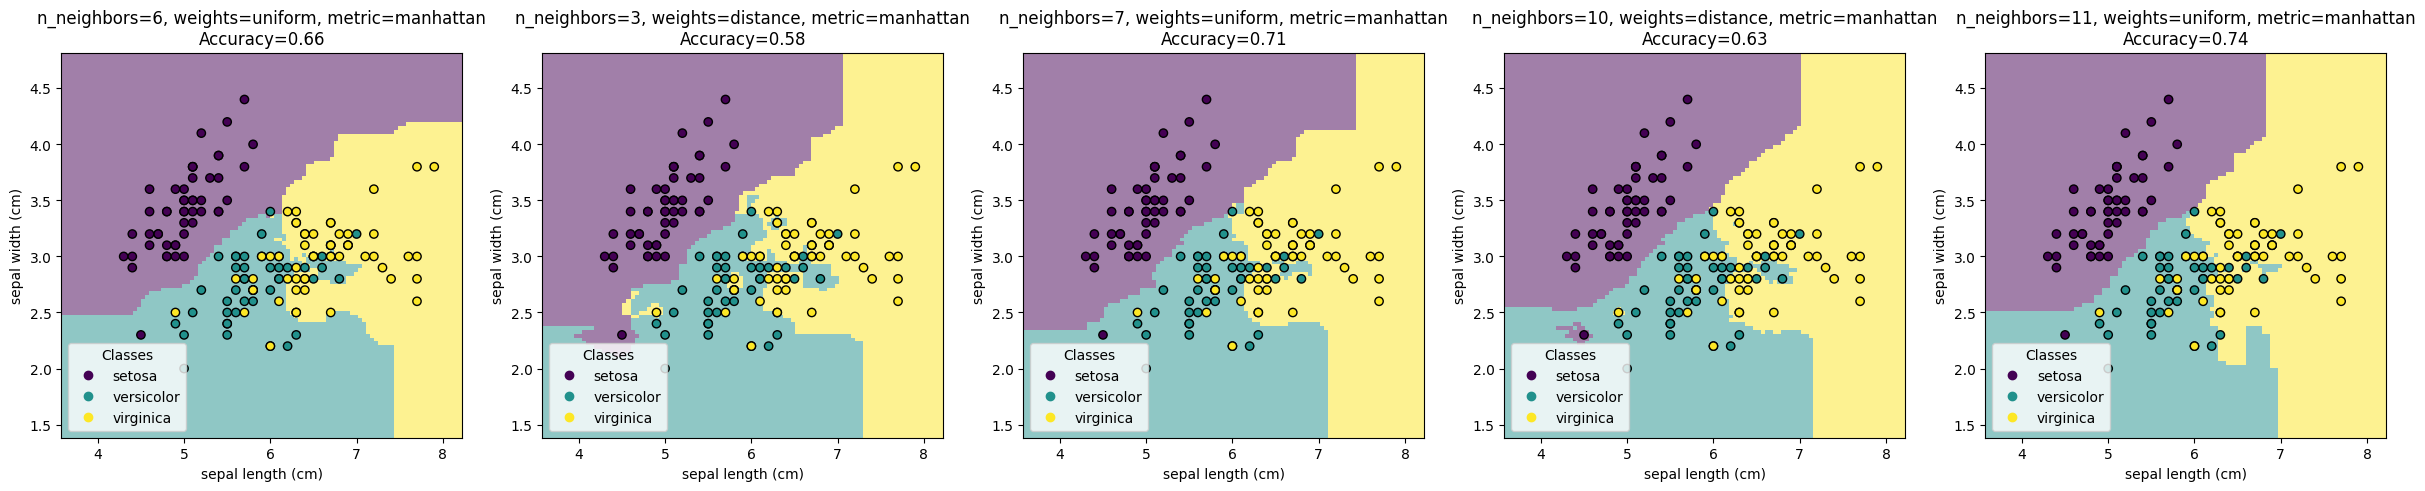

In [21]:
# данные
iris = load_iris(as_frame=True)
X = iris.data[["sepal length (cm)", "sepal width (cm)"]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)


param_combinations = [
    {"n_neighbors": 6, "weights": "uniform", "metric": "manhattan"},
    {"n_neighbors": 3, "weights": "distance", "metric": "manhattan"},
    {"n_neighbors": 7, "weights": "uniform", "metric": "manhattan"},
    {"n_neighbors": 10, "weights": "distance", "metric": "manhattan"},
    {"n_neighbors": 11, "weights": "uniform", "metric": "manhattan"}
]


fig, axs = plt.subplots(1, 5, figsize=(30, 5))


for ax, params in zip(axs, param_combinations):
    
    
    clf = Pipeline(
        steps=[("scaler", StandardScaler()), 
               ("knn", KNeighborsClassifier(n_neighbors=params["n_neighbors"], 
                                            weights=params["weights"], 
                                            metric=params["metric"]))]
    )
    
    clf.fit(X_train, y_train)
    
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    
    scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k")
    
    # Рассчитываем и выводим точность модели на тестовых данных
    accuracy = clf.score(X_test, y_test)
    
    
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="lower left",
        title="Classes",
    )
    
    
    _ = disp.ax_.set_title(
        f"n_neighbors={params['n_neighbors']}, weights={params['weights']}, metric={params['metric']}\nAccuracy={accuracy:.2f}"
    )

plt.show()

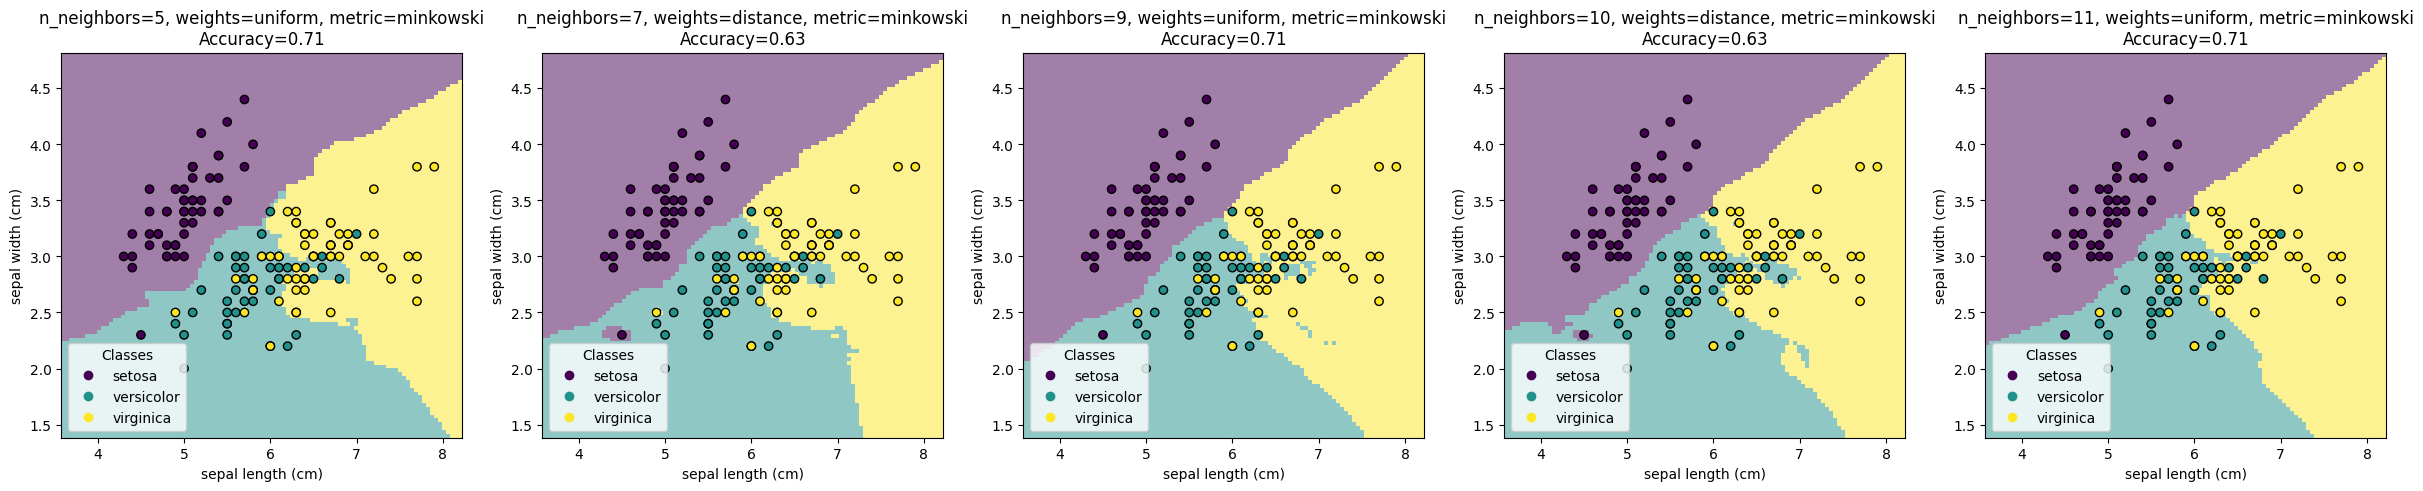

In [22]:
# данные
iris = load_iris(as_frame=True)
X = iris.data[["sepal length (cm)", "sepal width (cm)"]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)


param_combinations = [
    {"n_neighbors": 5, "weights": "uniform", "metric": "minkowski"},
    {"n_neighbors": 7, "weights": "distance", "metric": "minkowski"},
    {"n_neighbors": 9, "weights": "uniform", "metric": "minkowski"},
    {"n_neighbors": 10, "weights": "distance", "metric": "minkowski"},
    {"n_neighbors": 11, "weights": "uniform", "metric": "minkowski"}
]


fig, axs = plt.subplots(1, 5, figsize=(30, 5))


for ax, params in zip(axs, param_combinations):
    
    
    clf = Pipeline(
        steps=[("scaler", StandardScaler()), 
               ("knn", KNeighborsClassifier(n_neighbors=params["n_neighbors"], 
                                            weights=params["weights"], 
                                            metric=params["metric"]))]
    )
    
    clf.fit(X_train, y_train)
    
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    
    scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k")
    
    # Рассчитываем и выводим точность модели на тестовых данных
    accuracy = clf.score(X_test, y_test)
    
    
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="lower left",
        title="Classes",
    )
    
    
    _ = disp.ax_.set_title(
        f"n_neighbors={params['n_neighbors']}, weights={params['weights']}, metric={params['metric']}\nAccuracy={accuracy:.2f}"
    )

plt.show()